In [27]:
import numpy  as np
import pandas as pd

import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer

from sklearn.model_selection import KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

import seaborn as sns

import missingno as msno

## Regression(회귀) = 최적의 선
- 회귀란 종속변수(target)와 하나이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비선형 접근법
- 예측이고 예측을 위해서는 종속변수의 타입은 연속된 숫자이어야 한다.
- 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.

- Y = (w * x) + b
- w : weight, b : bias
- cost(w, b) - 업데이트를 통해서 예측값과 실제값의 차이를 계산

- 회귀계수 : coefficients -> 독립변수가 종속변수에 미치는 영향의 강도
- 회귀유형 : 독립변수 1개이면 단일회귀 - 선형회귀
- 회귀유형 : 독립변수 여러개이면 다중회귀 - 비선형회귀

In [5]:
print('단일회귀 - ')
print()
frm = pd.DataFrame({
    "height" : [1.47, 1.50, 1.52, 1.57, 1.60, 1.70, 1.75, 1.79, 1.80],
    "mass" : [52, 55, 56, 59, 60, 65, 69, 75, 79]
})

frm

단일회귀 - 



,height,mass
0,1.47,52
1,1.50,55
2,1.52,56
3,1.57,59
4,1.60,60
5,1.70,65
6,1.75,69
7,1.79,75
8,1.80,79


In [48]:
print("독립변수 또는 설명변수 - ")
print('type -', type(frm['height']))
# 데이터 프레임으로 변경할 것
print('type -', type(frm[['height']]), frm[['height']].shape)
X=frm[['height']]
frm[['height']]

독립변수 또는 설명변수 - 
type - <class 'pandas.core.series.Series'>
type - <class 'pandas.core.frame.DataFrame'> (9, 1)


,height
0,1.47
1,1.50
2,1.52
3,1.57
4,1.60
5,1.70
6,1.75
7,1.79
8,1.80


In [33]:
print("독립변수 또는 설명변수 - ")
print('type -', type(frm['mass']))
# 데이터 프레임으로 변경할 것
print('type -', type(frm[['mass']]), frm[['mass']].shape)
Y=frm[['mass']]

독립변수 또는 설명변수 - 
type - <class 'pandas.core.series.Series'>
type - <class 'pandas.core.frame.DataFrame'> (9, 1)


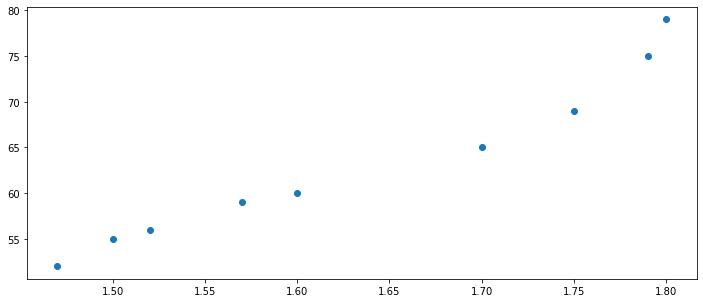

In [35]:
plt.figure(figsize=(12,5))

plt.plot(X,Y,'o')

plt.show()
plt.close()

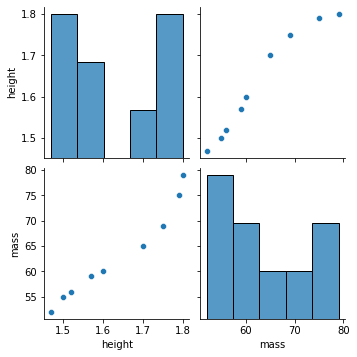

In [36]:
sns.pairplot(frm)
plt.show()
plt.close()

In [37]:
linear_model = LinearRegression()
linear_model.fit(X,Y)

LinearRegression()

In [41]:
print('사용자 데이터를 입력하여 예측값을 확인 - ')
user_pred = linear_model.predict([[1.79]]) #형식이 2차원이어야 함
print('user pred - ', user_pred)
y_pred = linear_model.predict(X)
print('y pred - ', y_pred)

사용자 데이터를 입력하여 예측값을 확인 - 
user pred -  [[74.41089357]]
y pred -  [[51.78438755]
 [53.90562249]
 [55.31977912]
 [58.85517068]
 [60.97640562]
 [68.04718876]
 [71.58258032]
 [74.41089357]
 [75.11797189]]


In [40]:
print("w=기울기 : ", linear_model.coef_)
print()
print('b = 절편 : ', linear_model.intercept_)

w=기울기 :  [[70.70783133]]

b = 절편 :  [-52.1561245]


In [42]:
(70.70783133 * 1.79) -52.1561245

74.41089358070002

In [43]:
print("R - squared(결정계수) -")
print()
print('R=', linear_model.score(X,Y))

R - squared(결정계수) -

R= 0.9512128024993962


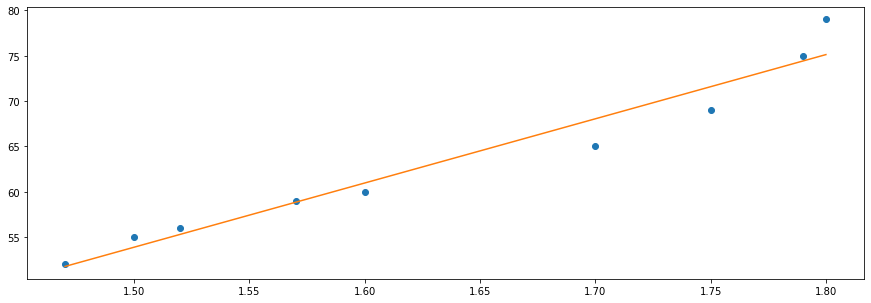

In [50]:
plt.figure(figsize=(15,5))

plt.plot(X,Y,'o')
plt.plot(X,y_pred)

plt.show()
plt.close()

In [55]:
mpg_frm = pd.read_csv('C:/Users/JYP/data/auto-mpg.csv', header=None)
mpg_frm.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acc', 'model_year', 'origin','name']
mpg_frm

,mpg,cylinders,displacement,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [54]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [56]:
mpg_frm.describe()

,mpg,cylinders,displacement,weight,acc,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [59]:
mpg_frm['horsepower'].values

array(['130.0', '165.0', '150.0', '150.0', '140.0', '198.0', '220.0',
       '215.0', '225.0', '190.0', '170.0', '160.0', '150.0', '225.0',
       '95.00', '95.00', '97.00', '85.00', '88.00', '46.00', '87.00',
       '90.00', '95.00', '113.0', '90.00', '215.0', '200.0', '210.0',
       '193.0', '88.00', '90.00', '95.00', '?', '100.0', '105.0', '100.0',
       '88.00', '100.0', '165.0', '175.0', '153.0', '150.0', '180.0',
       '170.0', '175.0', '110.0', '72.00', '100.0', '88.00', '86.00',
       '90.00', '70.00', '76.00', '65.00', '69.00', '60.00', '70.00',
       '95.00', '80.00', '54.00', '90.00', '86.00', '165.0', '175.0',
       '150.0', '153.0', '150.0', '208.0', '155.0', '160.0', '190.0',
       '97.00', '150.0', '130.0', '140.0', '150.0', '112.0', '76.00',
       '87.00', '69.00', '86.00', '92.00', '97.00', '80.00', '88.00',
       '175.0', '150.0', '145.0', '137.0', '150.0', '198.0', '150.0',
       '158.0', '150.0', '215.0', '225.0', '175.0', '105.0', '100.0',
       '100.0',

In [62]:
mpg_frm['horsepower'].replace('?', np.NaN, inplace = True)
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [65]:
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype('float')
mpg_frm['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [66]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acc           392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [67]:
print('다중회귀')
mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower' , 'weight']]
mpg_subset_frm

다중회귀


,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


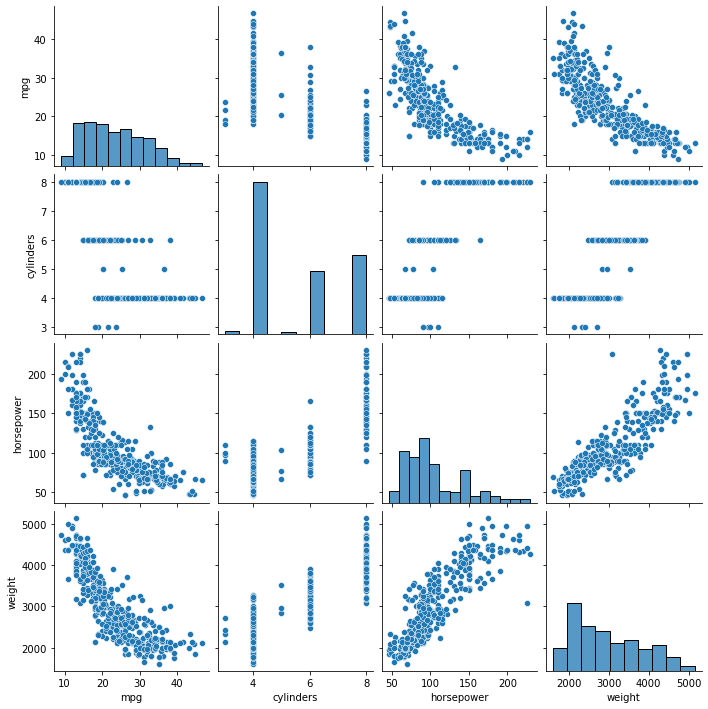

In [68]:
sns.pairplot(mpg_subset_frm) # 여러개 그래프로 보여줌(산점도를 하나로 모아둔 것)
plt.show()
plt.close()

In [69]:
print('종속변수 독립변수 분리 - ')
print('종속변수 - ')
Y = mpg_subset_frm['mpg'] # 종속변수는 대문자
print('독립변수 - ')
X = mpg_subset_frm[['cylinders', 'horsepower', 'weight']]

종속변수 독립변수 분리 - 
종속변수 - 
독립변수 - 


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 3), (79, 3), (313,), (79,))

In [72]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(X_train, y_train)
print("w=기울기 : ", mpg_linear_model.coef_)
print()
print('b = 절편 : ', mpg_linear_model.intercept_)

w=기울기 :  [-0.22120285 -0.04519504 -0.00545691]

b = 절편 :  45.602640116683254


In [74]:
print('모델의 신뢰도 - score')
r_squared=mpg_linear_model.score(X_test, y_test)
print(r_squared)


모델의 신뢰도 - score
0.7126685040232241


In [75]:
print('예측 -')
y_pred = mpg_linear_model.predict(X_test)
y_pred

예측 -


array([29.15930055, 24.26834707, 30.23655307, 29.29572319, 13.93285098,
       18.51149152, 27.82822126, 23.44409321, 16.5630796 , 27.99346823,
       15.15198305, 24.2631867 , 24.75404715, 26.56586572, 18.01920049,
       29.06526385, 18.06975264, 28.96830884, 29.88493378, 22.17055337,
       23.78847135, 33.36924881, 18.50573808, 25.12479307, 20.66863496,
       25.23100457, 16.90783744, 18.76056365, 20.7099223 , 11.73134061,
       21.75373001, 27.98857835, 29.64356062, 26.53228677, 29.97743068,
       15.55355202, 27.27777604, 19.83275559, 22.86328388, 19.94735062,
       30.59433154, 10.0935145 , 29.25290547, 24.60459445, 26.82304257,
        9.51732455, 31.5944851 , 30.27461616, 16.9017043 , 27.46682221,
       22.27955624, 26.75167101, 22.68574459, 29.48125799, 30.19738196,
       26.33443361, 25.38242884, 32.52734551,  9.28829579, 14.23687188,
       26.52472304, 29.65420394, 30.75720119, 17.67588265, 23.74325027,
       15.51759575, 21.28486899, 31.84774484, 29.42277182, 31.04

In [76]:
regression_actual_guess = pd.DataFrame({
    'actual' : y_test,
    'guess' : y_pred
})
regression_actual_guess

,actual,guess
269,30.9,29.159301
276,21.6,24.268347
51,30.0,30.236553
381,36.0,29.295723
93,14.0,13.932851
...,...,...
249,19.9,20.499075
248,36.1,32.183696
104,12.0,9.513865
63,14.0,11.995353


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


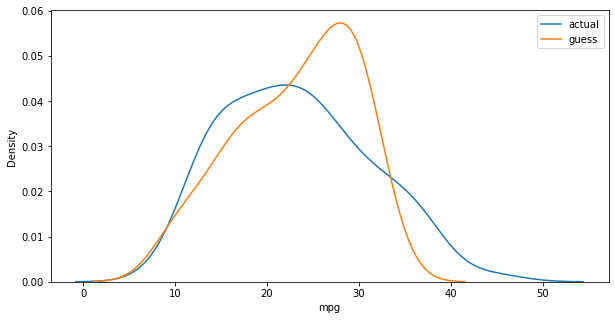

In [78]:
plt.figure(figsize=(10,5))

ax1 = sns.distplot(y_test, hist=False, label='actual')
ax2 = sns.distplot(y_pred, hist=False, label='guess')

plt.legend()
plt.show()
plt.close()

In [79]:
house_frm = pd.read_csv('C:/Users/JYP/data/manhattan.csv')
house_frm.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [80]:
house_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [81]:
house_frm.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [82]:
print('종속변수 - ')
Y = house_frm['rent'] # 종속변수는 대문자
print('독립변수 - ')
X = house_frm[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 
               'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 
               'has_doorman', 'has_elevator', 'has_dishwasher']]

종속변수 - 
독립변수 - 


상관관계 분석을 위한 시각화 - 



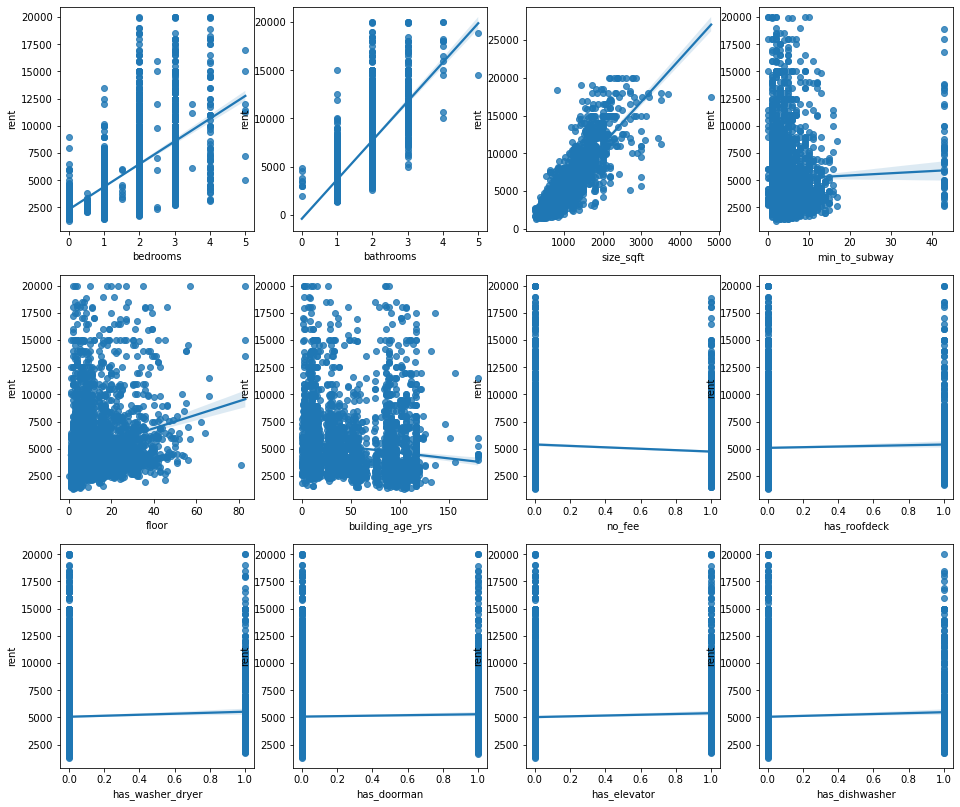

In [84]:
print('상관관계 분석을 위한 시각화 - ')
print()
fig, axs = plt.subplots(figsize=(16,14), ncols=4, nrows=3)

for idx, feature in enumerate(X) : #enumerate는 인덱스와 함께 가져온다
    row = int(idx/4)
    col = idx %4
    sns.regplot(x=feature, y='rent', data=house_frm, ax=axs[row][col])

In [ ]:
print('1. 데이터세트 분리')
print('2. 모델생성 및 학습')
print('3. 기울기, 절편 확인')
print('4. 모델의 신뢰도(결정계수 확인)')
print('5. 사용자의 데이터를 넣어서 가격 예측')
print('6. 실제 임대료, 예측 임대료 프레임 구축')
print('7. scatter 이용해서 실제 입대로, 예측 임대료 분포를 확인!')





In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2831, 12), (708, 12), (2831,), (708,))

In [90]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(X_train, y_train)
print("기울기 : ", mpg_linear_model.coef_)
print()
print('절편 : ', mpg_linear_model.intercept_)

기울기 :  [-301.99040555 1085.57668085    5.03247417  -17.35946983   21.91516788
   -7.61686901 -101.33412285   22.14164336  100.91379641 -138.52720712
   95.25904751  -28.8310954 ]

절편 :  -415.54970617644904


In [87]:
print('모델의 신뢰도 - score')
r_squared=mpg_linear_model.score(X_test, y_test)
print(r_squared)


모델의 신뢰도 - score
0.7755500045785777


In [92]:
print('예측 -')
my_apt=[[2,1,620,10,11,12,0,0,1,0,1,1]]
user_pred = mpg_linear_model.predict(my_apt)
user_pred

예측 -


array([3329.59161921])

In [93]:
regression_actual_guess = pd.DataFrame({
    'actual' : y_test,
    'guess' : y_pred
})
regression_actual_guess

,actual,guess
30,2100,1852.823015
2977,3500,4612.554800
2350,2800,3401.780573
1305,3120,2563.790160
207,7000,12516.986227
...,...,...
921,6900,6983.193805
3526,3800,3907.616621
298,3688,4368.695199
1292,7350,6127.194888


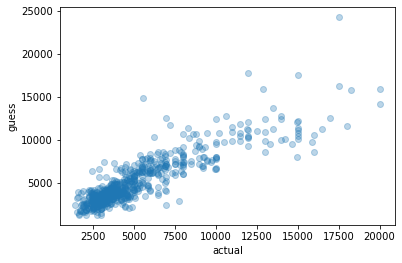

In [96]:
plt.scatter(y_test, y_pred, alpha=0.3)

plt.xlabel('actual')
plt.ylabel('guess')

plt.show()
plt.close()

## 성능지표

In [99]:
iris = load_iris()
print('type -', type(iris))
print('keys -', iris.keys())
print('0 -> setosa, 1-> versicolor, 2->vriginica')


type - <class 'sklearn.utils.Bunch'>
keys - dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [101]:
# 종속변수
Y=pd.DataFrame(iris.target, columns=['species'])
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [102]:
# 독립변수
X=pd.DataFrame(iris.data, columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [104]:
Y['species'] = Y['species'].replace([0,1,2],['setsa', 'versicolor', 'vriginica'])
iris_frm = pd.concat([X,Y], axis=1) #프레임과 프레임을 합침
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setsa
1,4.9,3.0,1.4,0.2,setsa
2,4.7,3.2,1.3,0.2,setsa
3,4.6,3.1,1.5,0.2,setsa
4,5.0,3.6,1.4,0.2,setsa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,vriginica
146,6.3,2.5,5.0,1.9,vriginica
147,6.5,3.0,5.2,2.0,vriginica
148,6.2,3.4,5.4,2.3,vriginica


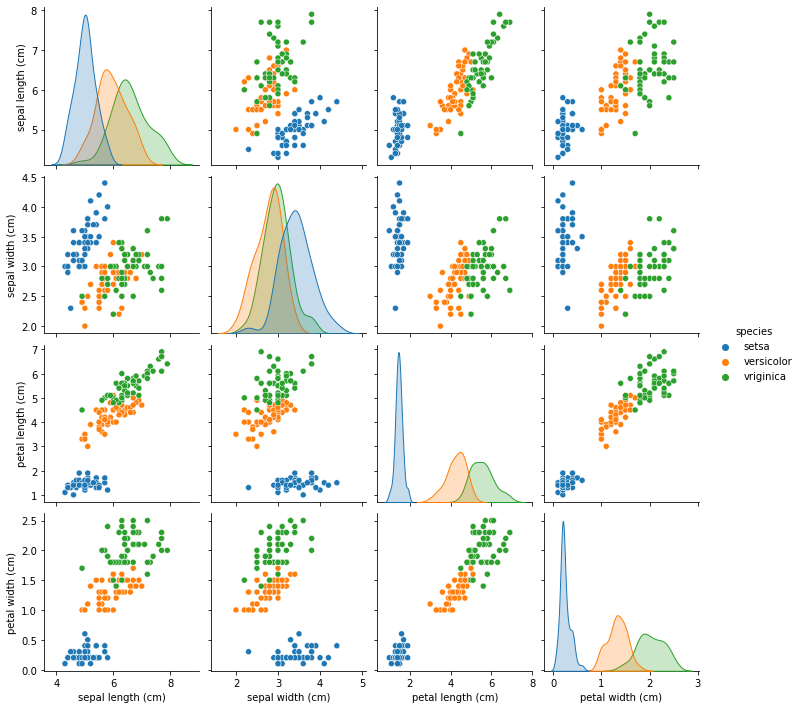

In [106]:
# sns.pairplot(iris_frm)
sns.pairplot(iris_frm, hue='species')

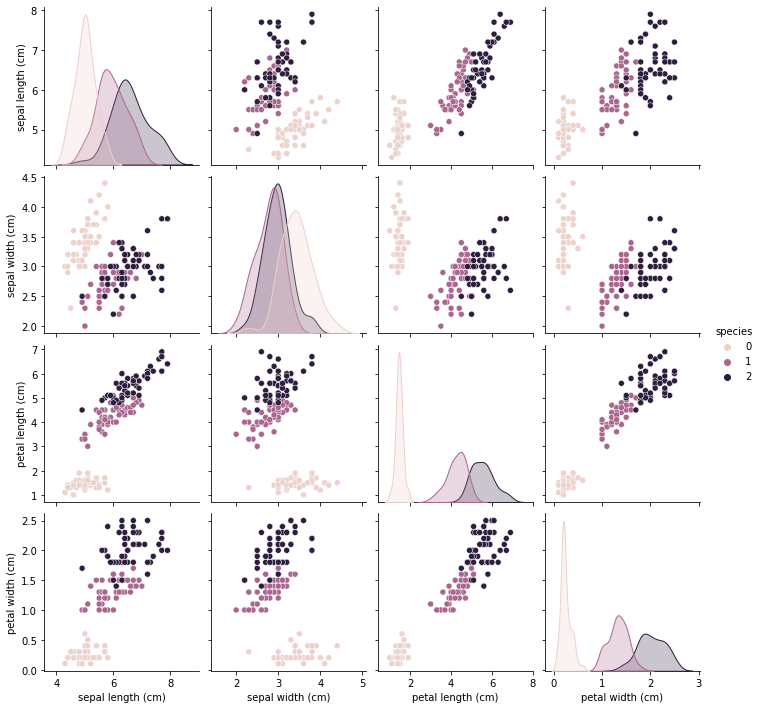

In [107]:
# 원복
iris_frm['species']=iris_frm['species'].replace(['setsa', 'versicolor', 'vriginica'],[0,1,2])
sns.pairplot(iris_frm, hue='species')

In [108]:
iris_frm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [109]:
#종속변수
Y=iris_frm['sepal length (cm)']
#독립변수
X=iris_frm.drop('sepal length (cm)', axis=1)

In [110]:
iris_model = LinearRegression()
iris_model.fit(X, Y)


LinearRegression()

In [111]:
r_squared = iris_model.score(X, Y)
r_squared

0.8621931701975809

In [112]:
user_pred = iris_model.predict([[4.2, 1.3, 0.2, 1]])
user_pred

array([5.13591913])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [114]:
iris_model = LinearRegression()
iris_model.fit(X, Y)

LinearRegression()

In [115]:
r_squared = iris_model.score(X, Y)
r_squared

0.8621931701975809

In [116]:
y_pred = iris_model.predict(X_test)
iris_actual_guess = pd.DataFrame({
    'actual_sepal_length' : y_test,
    'guess_sepal_length' : y_pred
})
iris_actual_guess

,actual_sepal_length,guess_sepal_length
84,5.4,6.237121
122,7.7,7.317903
28,5.2,4.936345
24,4.8,5.307807
75,6.6,6.203276
109,7.2,7.170132
81,5.5,5.469853
98,5.1,4.971886
80,5.5,5.503698
100,6.3,6.908256


In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [121]:
print('성능평가 지표 -')
print()
print('mae - ', mean_absolute_error(y_test, y_pred))
print('mse - ', mean_squared_error(y_test, y_pred))
print('rmse - ', np.sqrt(mean_squared_error(y_test, y_pred))) #루트를 씌우는 것은 실제 데이터 값에 가깝게 된다?
print('R - ', iris_model.score(X_test, y_test))

성능평가 지표 -

mae -  0.2512639490984394
mse -  0.10548299007402201
rmse -  0.3247814497073717
R -  0.8691205869270159
